# Retail Sales Exploratory Data Analysis

This notebook analyzes online retail sales data to uncover insights about customer behavior, product performance, and sales patterns.

## 1. Setup and Imports

In [3]:
# ========================
# 1. Setup
# ========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set styles
sns.set(style="whitegrid", palette="muted")
plt.rcParams["figure.figsize"] = (12,6)

## 2. Load Data

In [4]:
# ========================
# 2. Load Data
# ========================
# Download dataset from UCI/Kaggle and adjust path accordingly
df = pd.read_excel("Online Retail.xlsx")

# Quick look
print(df.shape)
df.head()

(541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## 3. Data Cleaning

In [5]:
# ========================
# 3. Data Cleaning
# ========================
# Drop rows with missing CustomerID
df = df.dropna(subset=["CustomerID"])

# Remove cancellations (InvoiceNo starting with 'C')
df = df[~df["InvoiceNo"].astype(str).str.startswith("C")]

# Create TotalPrice column
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]

# Parse dates
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
df["Year"] = df["InvoiceDate"].dt.year
df["Month"] = df["InvoiceDate"].dt.month
df["DayOfWeek"] = df["InvoiceDate"].dt.day_name()
df["Hour"] = df["InvoiceDate"].dt.hour

## 4. Exploratory Analysis

In [6]:
# ========================
# 4. Exploratory Analysis
# ========================

# --- Basic stats ---
print("Unique customers:", df["CustomerID"].nunique())
print("Unique products:", df["StockCode"].nunique())
print("Unique countries:", df["Country"].nunique())

Unique customers: 4339
Unique products: 3665
Unique countries: 37


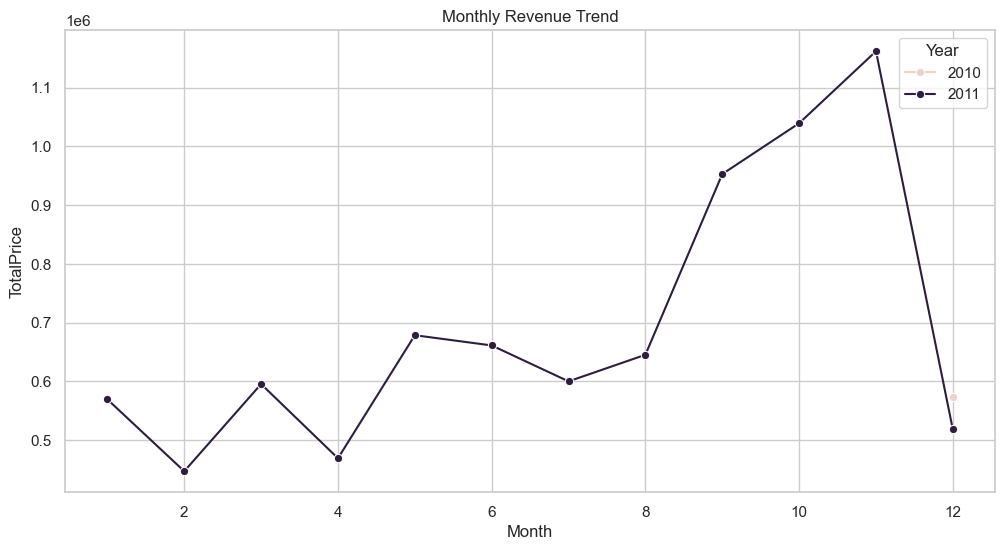

In [7]:
# --- Revenue by Month ---
monthly_sales = df.groupby(["Year","Month"])["TotalPrice"].sum().reset_index()
sns.lineplot(data=monthly_sales, x="Month", y="TotalPrice", hue="Year", marker="o")
plt.title("Monthly Revenue Trend")
plt.show()

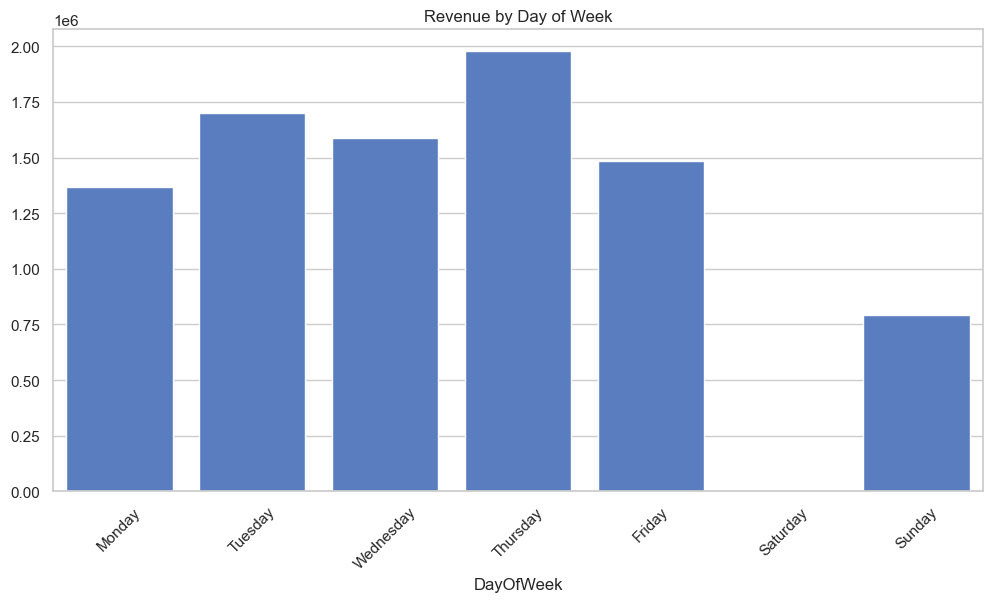

In [8]:
# --- Revenue by Day of Week ---
dow_sales = df.groupby("DayOfWeek")["TotalPrice"].sum().reindex(
    ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
)
sns.barplot(x=dow_sales.index, y=dow_sales.values)
plt.title("Revenue by Day of Week")
plt.xticks(rotation=45)
plt.show()

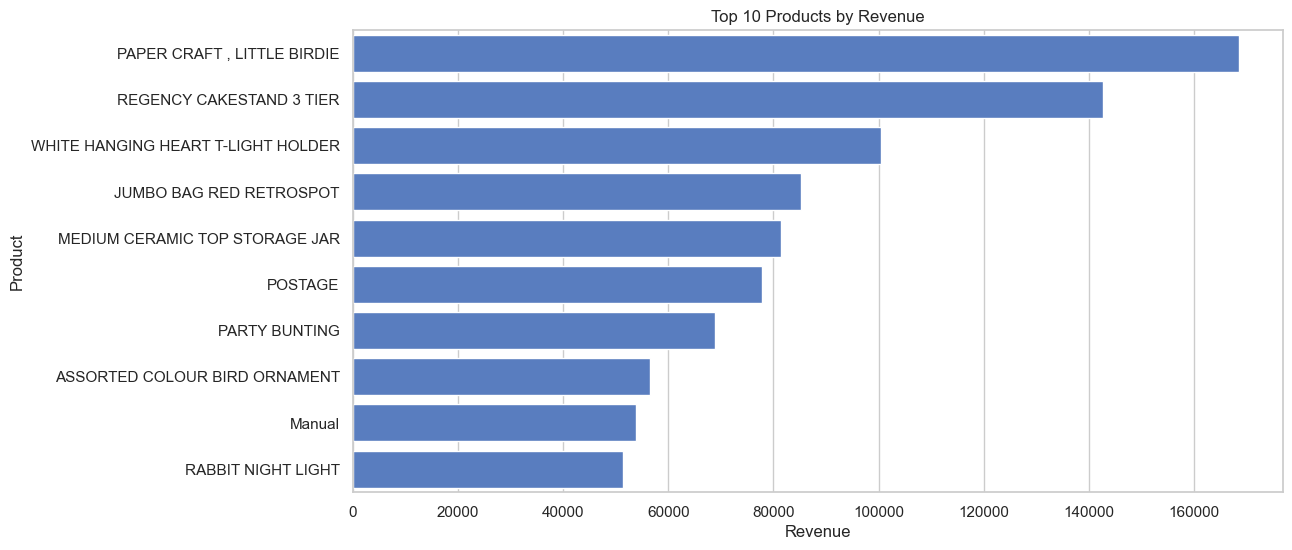

In [9]:
# --- Top 10 Products ---
top_products = df.groupby("Description")["TotalPrice"].sum().sort_values(ascending=False).head(10)
sns.barplot(y=top_products.index, x=top_products.values)
plt.title("Top 10 Products by Revenue")
plt.xlabel("Revenue")
plt.ylabel("Product")
plt.show()

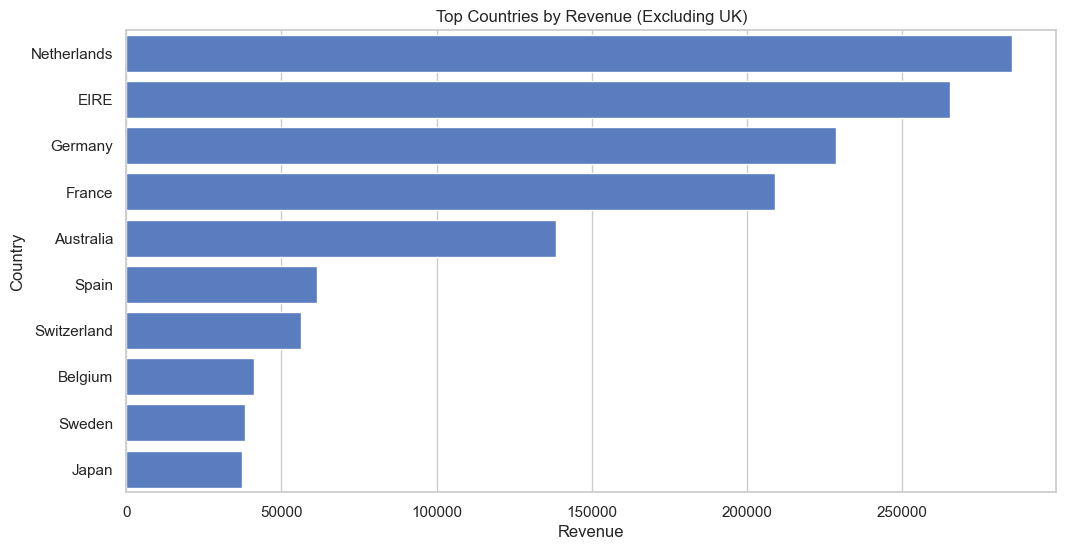

In [10]:
# --- Sales by Country (excluding UK) ---
country_sales = df.groupby("Country")["TotalPrice"].sum().sort_values(ascending=False).drop("United Kingdom").head(10)
sns.barplot(y=country_sales.index, x=country_sales.values)
plt.title("Top Countries by Revenue (Excluding UK)")
plt.xlabel("Revenue")
plt.ylabel("Country")
plt.show()

## 5. Insights and Conclusions

In [11]:
# ========================
# 5. Insights (to write in README)
# ========================
# Example insights you might find:
# - UK dominates revenue, but Netherlands/Germany are key international markets
# - Revenue spikes during Q4 → holiday effect
# - Small % of products generate majority of revenue (Pareto effect)

print("Analysis complete! Check the visualizations above for insights.")

Analysis complete! Check the visualizations above for insights.
